## Example: Principal Component Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scratch.algos.pca import PCA

plt.rcParams["figure.figsize"] = (20, 10)
sns.set(font_scale=2)
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("../data/iris.csv", header=0).sample(frac=1)

print("Dimensions:", df.shape)
print("Columns:", df.columns.tolist())

target = "Species"
X = df.drop(columns=[target])
y = df.Species.values

Dimensions: (150, 5)
Columns: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [3]:
m = PCA()
m.fit(X=X)
components = m.predict()

In [4]:
ev_pct_ind = m.eigenvalues / np.sum(m.eigenvalues)
ev_pct_cum = np.cumsum(ev_pct_ind)

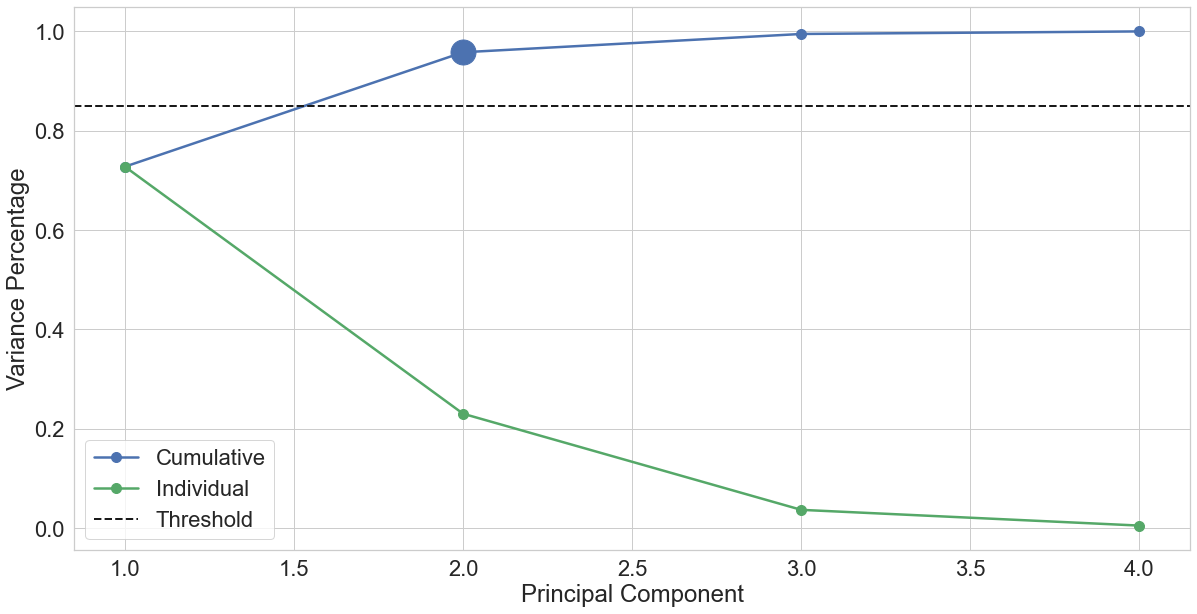

In [5]:
# explained variance
threshold=0.85

optim_val = np.min(ev_pct_cum[ev_pct_cum >= threshold])
optim_idx = np.where(ev_pct_cum == optim_val)[0][0]

xs = range(1, X.shape[1] + 1)

plt.plot(xs, ev_pct_cum, "o-", c="b", lw=2.5, ms=10, label="Cumulative")
plt.plot(xs, ev_pct_ind, "o-", c="g", lw=2.5, ms=10, label="Individual")
plt.plot(optim_idx + 1, optim_val, "o", c="b", ms=25)
plt.axhline(threshold, ls='--', lw=2, c="k", label="Threshold")
plt.xlabel("Principal Component")
plt.ylabel("Variance Percentage")
plt.legend()
plt.show()

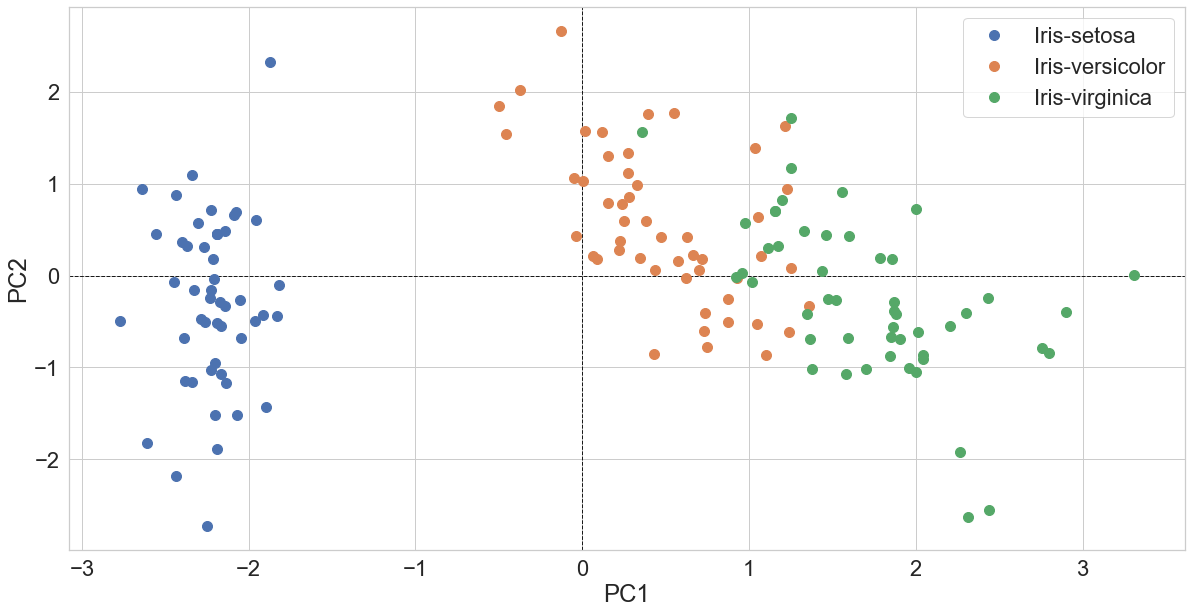

In [6]:
# biplot
plt.axvline(0, c="k", lw=1, ls="--")
plt.axhline(0, c="k", lw=1, ls="--")
for i in np.unique(y):
    idx = np.where(y == i)[0]
    c1 = components[:, 0]
    c2 = components[:, 1]
    plt.plot(c1[idx], c2[idx], "o", ms=10, label=i)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()